In [1]:
import pandas as pd

In [2]:
tmp_priceclose = pd.read_csv('data/priceclose_complete.csv')
tmp_priceclose

,Unnamed: 0,Instrument,Price Close,Date,CallDate
0,0,III.L,11.126733,1999-12-30T00:00:00Z,2000-01-01
1,1,A2.MI,3.908705,1999-12-30T00:00:00Z,2000-01-01
2,2,ABBN.S,21.653580,1999-12-30T00:00:00Z,2000-01-01
3,3,ABE.MC^H18,4.210267,1999-12-30T00:00:00Z,2000-01-01
4,4,ABF.L,5.448069,1999-12-30T00:00:00Z,2000-01-01
...,...,...,...,...,...
166038,595,WLN.PA,36.530000,2022-12-30T00:00:00Z,2023-01-01
166039,596,WPP.L,9.271093,2022-12-30T00:00:00Z,2023-01-01
166040,597,YAR.OL,41.071060,2022-12-30T00:00:00Z,2023-01-01
166041,598,ZALG.DE,33.110000,2022-12-30T00:00:00Z,2023-01-01


In [3]:
pivoted_priceclose = tmp_priceclose.pivot(index='CallDate',columns='Instrument',values='Price Close')
pivoted_priceclose

Instrument,1COV.DE,1U1.DE,A2.MI,A3M.MC,AAAA.L^C21,AAH.AS^D08,AAK.ST,AAL.L,AALB.AS,AB.L^G07,...,YAR.OL,YIT.HE,YSO.LS,ZALG.DE,ZEL.MC^K15,ZIGGO.AS^L14,ZO1G.DE^A22,ZODC.PA^C18,ZOT.MC^E22,ZURN.S
CallDate,,,,,,,,,,,,,,,,,,,,,
2000-01-01,NaN,NaN,3.908705,NaN,NaN,24.80,NaN,NaN,NaN,10.154141,...,NaN,NaN,1.428478,NaN,NaN,NaN,NaN,NaN,NaN,413.340509
2000-02-01,NaN,NaN,4.320199,NaN,NaN,21.25,NaN,NaN,NaN,8.886645,...,NaN,NaN,1.445925,NaN,NaN,NaN,NaN,NaN,NaN,349.877344
2000-03-01,NaN,NaN,6.246428,NaN,NaN,21.69,NaN,NaN,NaN,8.535433,...,NaN,NaN,1.763243,NaN,NaN,NaN,NaN,NaN,NaN,325.990103
2000-04-01,NaN,NaN,5.380019,NaN,NaN,23.29,NaN,12.087483,NaN,9.415363,...,NaN,NaN,1.418936,NaN,NaN,NaN,NaN,NaN,NaN,385.143315
2000-05-01,NaN,NaN,4.683340,NaN,NaN,22.44,NaN,11.457383,NaN,8.905127,...,NaN,NaN,1.204937,NaN,NaN,NaN,NaN,NaN,NaN,342.378867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-01,29.58,NaN,1.100000,NaN,NaN,NaN,14.827301,31.083531,35.33,NaN,...,41.615730,NaN,NaN,22.05,NaN,NaN,NaN,NaN,NaN,433.178707
2022-10-01,29.54,NaN,0.999800,NaN,NaN,NaN,13.588663,31.154221,33.77,NaN,...,35.945404,NaN,NaN,20.23,NaN,NaN,NaN,NaN,NaN,408.493565
2022-11-01,33.93,NaN,1.123000,NaN,NaN,NaN,14.640019,32.173170,35.77,NaN,...,45.212849,NaN,NaN,24.30,NaN,NaN,NaN,NaN,NaN,430.711694


<AxesSubplot: xlabel='CallDate'>

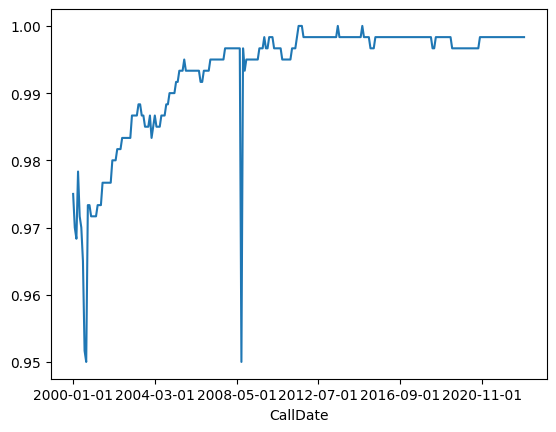

In [4]:
(pivoted_priceclose.T.notna().sum()/600).plot()

In [5]:
pivoted_priceclose.to_csv('data/Final Data/PriceClose.csv')

<AxesSubplot: xlabel='CallDate'>

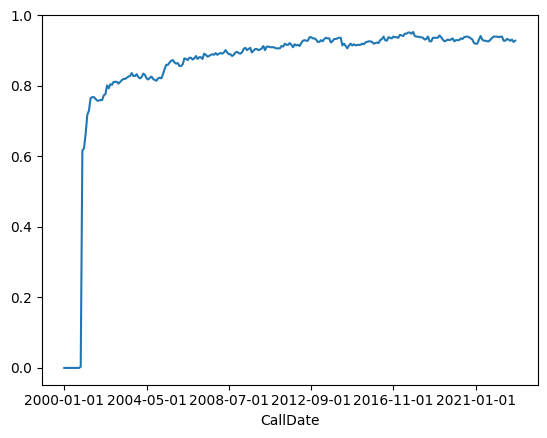

In [6]:
try_1_df = pd.read_csv('data/pcf_download.csv').drop(columns=['Unnamed: 0','PCFperShare']).rename(columns={'Price To Cash Flow Per Share (Daily Time Series Ratio)':'PCFperShare'})
try_2_df = pd.read_csv('data/retry_pcf_download.csv').drop(columns='Unnamed: 0').rename(columns={'Price To Cash Flow Per Share (Daily Time Series Ratio)':'PCFperShare'})
pivoted_try_1_df = try_1_df.pivot(index='CallDate',columns='Instrument',values='PCFperShare')
pivoted_try_2_df = try_2_df.pivot(index='CallDate',columns='Instrument',values='PCFperShare')
bad_ones_try_1 = pivoted_try_1_df.loc[(pivoted_try_1_df.notna().sum(axis=1)/600)<=0.9].notna().sum(axis=1)/600
bad_ones_try_2 = pivoted_try_2_df.loc[(pivoted_try_2_df.notna().sum(axis=1)/600)<=0.9].notna().sum(axis=1)/600
values_try_1 = pivoted_try_1_df.loc[pivoted_try_2_df.index].notna().sum(axis=1)/600
values_try_2 = pivoted_try_2_df.notna().sum(axis=1)/600
better_in_2_list = values_try_2.loc[values_try_2>values_try_1].index.tolist()
better_in_2_df = pivoted_try_2_df.loc[better_in_2_list]
done_columns = pivoted_try_1_df.loc[:,pivoted_try_2_df.columns]
done_columns.loc[better_in_2_list] = better_in_2_df
remaining_columns = pivoted_try_1_df.loc[:,list(set(pivoted_try_1_df.columns)-set(pivoted_try_2_df.columns))]
final_df = done_columns.merge(remaining_columns,left_index=True,right_index=True)
(final_df.notna().sum(axis=1)/600).plot()

In [8]:
final_df.to_csv('data/Final Data/PCFperShare.csv')

In [9]:
constituents_lists = pd.read_csv('data/constituents_lists.csv')
constituents_lists

,Unnamed: 0,Data_Download_List,JL_List
0,0,BKWB.S,BKWB.S
1,1,AGGK.L^H21,AGGK.L^H21
2,2,BITTI.HE,BITTI.HE
3,3,FIA_p.MI^E12,FIA_p.MI^E12
4,4,CMIP.PA^C15,CMIP.PA^C15
...,...,...,...
1578,1578,JM.ST,LEGD.PA
1579,1579,AGRP.L,MORG.DE
1580,1580,TOP.CO,NaN
1581,1581,LEGD.PA,NaN


In [11]:
constituents_lists.drop(columns='Unnamed: 0').to_csv('data/Final Data/constituents_lists.csv',index=False)

In [1]:
import pandas as pd

In [2]:
raw_df = pd.read_csv('data/raw_data/raw_TotalDebtToEV.csv')

C:\Users\hugo.perezdealbeniz\AppData\Local\Temp\ipykernel_15356\538295003.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  raw_df = pd.read_csv('data/raw_data/raw_TotalDebtToEV.csv')


In [15]:
name = raw_df.columns[3]

In [16]:
raw_df.rename({name:'data'},inplace=True)

In [19]:
raw_df['data'] = raw_df.iloc[:,3]

<AxesSubplot: xlabel='CallDate'>

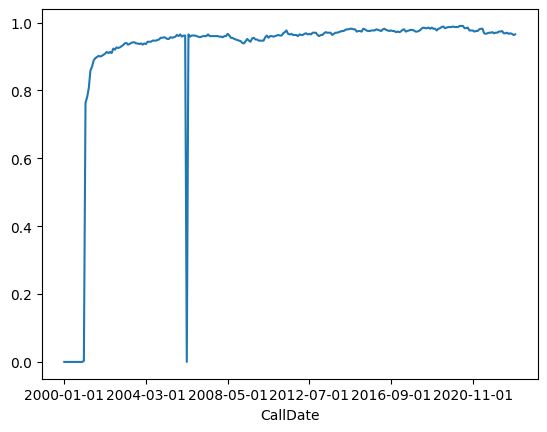

In [22]:
(raw_df.pivot(index='CallDate',columns='Instrument',values='data').notna().sum(axis=1)/600).plot()

In [23]:
to_save = raw_df.pivot(index='CallDate',columns='Instrument',values='data')

In [24]:
to_save.to_csv('data/pivoted_data/pivoted_TotalDebtToEV.csv')

In [25]:
divyield = pd.read_csv('data/pivoted_data/pivoted_DividendYield.csv',index_col=0)

<AxesSubplot: xlabel='CallDate'>

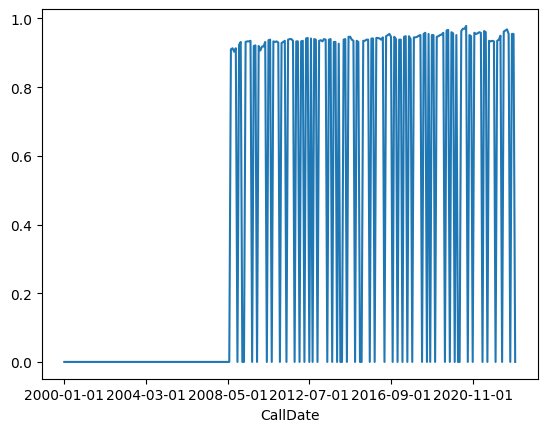

In [27]:
(divyield.notna().sum(axis=1)/600).plot()

<AxesSubplot: xlabel='CallDate'>

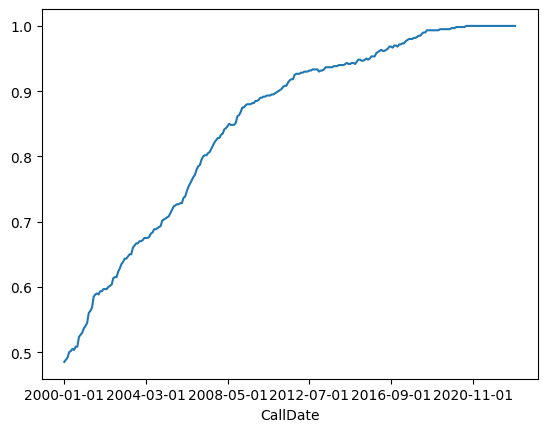

In [28]:
mktcap = pd.read_csv('data/pivoted_data/pivoted_CompanyMarketCapitalization.csv',index_col=0)
(mktcap.notna().sum(axis=1)/600).plot()

<AxesSubplot: xlabel='CallDate'>

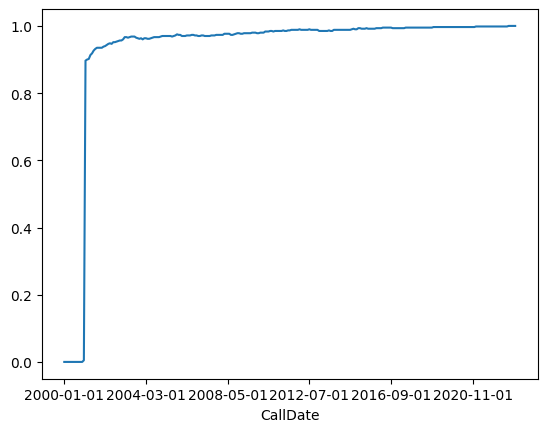

In [29]:
EV = pd.read_csv('data/pivoted_data/pivoted_EV.csv',index_col=0)
(EV.notna().sum(axis=1)/600).plot()